In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
     

In [4]:
from torch import nn
import torch
from torch.autograd import Variable
     

In [5]:
data = pd.read_csv("/content/demo.csv")
data.head()

,Year,Month,Irrigation,Rainfall,Tem,Evaporation,Depth
0,2000,1,1992.508320,314.195717,49.295408,12040.44764,80.972729
1,2000,2,-2042.251709,-1633.766775,48.449836,18045.51683,87.837238
2,2000,3,-1374.450691,868.263711,46.962377,90248.59869,100.716838
3,2000,4,29951.326600,309.857143,63.165645,141672.95100,86.904410
4,2000,5,43748.371150,-291.325005,59.602103,188789.21330,60.858177


In [ ]:
data.info()   #this shows the size of dataset and no entry contains null value
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         252 non-null    int64  
 1   Month        252 non-null    int64  
 2   Irrigation   252 non-null    float64
 3   Rainfall     252 non-null    float64
 4   Tem          252 non-null    float64
 5   Evaporation  252 non-null    float64
 6   Depth        252 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 13.9 KB


In [ ]:
data.max()

Year             2020.000000
Month              12.000000
Irrigation      69045.535660
Rainfall        74516.370880
Tem               110.797848
Evaporation    205855.274400
Depth              18.837238
dtype: float64

In [ ]:
data.min()

Year           2000.000000
Month             1.000000
Irrigation    -3822.751642
Rainfall      -1956.052536
Tem             -57.791476
Evaporation      21.308487
Depth             3.949962
dtype: float64

In [ ]:
new_df = data[:12] #dataset for year 2000
new_df
     

,Year,Month,Irrigation,Rainfall,Tem,Evaporation,Depth
0,2000,1,1992.508320,314.195717,-19.295408,12040.44764,8.972729
1,2000,2,-2042.251709,-1633.766775,-38.449836,18045.51683,8.837238
2,2000,3,-1374.450691,868.263711,-36.962377,90248.59869,10.716839
3,2000,4,29951.326600,309.857143,-13.165645,141672.95100,8.904410
4,2000,5,43748.371150,-291.325005,19.602103,188789.21330,6.858177
5,2000,6,34502.648660,17799.096830,57.737034,149223.64210,5.284515
6,2000,7,30296.987390,14179.731050,91.136063,173045.99630,6.096910
7,2000,8,19459.005160,29671.991290,106.061944,125595.39410,7.886008
8,2000,9,17758.697580,21215.182310,110.797848,93648.56533,7.917243
9,2000,10,62539.841420,4294.421332,86.914527,55423.35440,7.545082


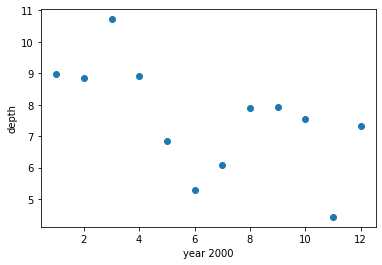

In [ ]:
%matplotlib inline
plt.xlabel('year 2000')
plt.ylabel('depth')
plt.scatter(new_df['Month'],new_df['Depth'])

In [ ]:
new_df1 = data[12:24] #dataset for year 2000
new_df1
     

,Year,Month,Irrigation,Rainfall,Tem,Evaporation,Depth
12,2001,1,-1446.375486,457.590909,-11.694435,16903.900810,7.546799
13,2001,2,1994.960902,78.495378,-32.958229,43792.840110,8.835951
14,2001,3,-267.364365,-577.814915,-44.369236,83874.316060,10.207740
15,2001,4,26117.153690,156.311211,-5.742582,131993.693700,8.404850
16,2001,5,44438.827240,7482.362433,34.828554,187135.718800,6.610253
17,2001,6,40444.506300,1747.636448,68.822504,184055.273500,6.081911
18,2001,7,40209.040550,8124.129400,78.514305,188270.500200,7.310332
19,2001,8,23856.460210,26413.036280,100.759264,158303.293200,6.953447
20,2001,9,15448.599310,41288.384650,90.377547,90812.445620,7.282063
21,2001,10,64213.734410,36381.062050,77.856884,65292.571320,7.714108


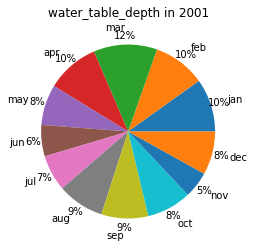

In [ ]:
plt.title("water_table_depth in 2001")
y = np.array(new_df['Depth'])
plt.pie(y, labels=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
# plt.legend()
plt.show()

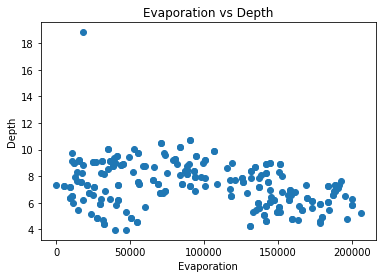

In [ ]:
plt.title('Evaporation vs Depth')
plt.xlabel('Evaporation')
plt.ylabel('Depth')
plt.scatter(data['Evaporation'],data['Depth'])

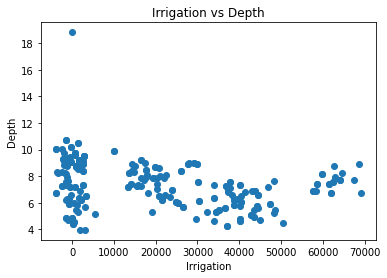

In [ ]:
plt.title('Irrigation vs Depth')
plt.xlabel('Irrigation')
plt.ylabel('Depth')
plt.scatter(data['Irrigation'],data['Depth'])
     

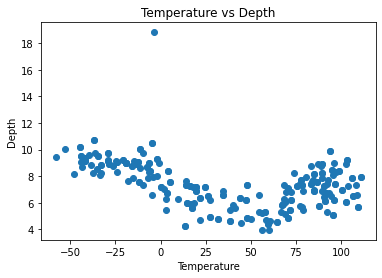

In [ ]:
plt.title('Temperature vs Depth')
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.scatter(data['Tem'],data['Depth'])

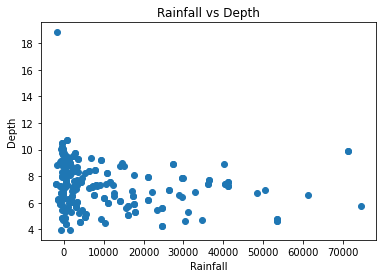

In [ ]:
plt.title('Rainfall vs Depth')
plt.xlabel('Rainfall')
plt.ylabel('Depth')
plt.scatter(data['Rainfall'],data['Depth'])

In [ ]:
 year = data['Year'].unique()
year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
max_irr_in_year=[]
max_rain_in_year=[]
max_tem_in_year=[]
max_evp_in_year=[]
max_dep_in_year=[]

min_irr_in_year=[]
min_rain_in_year=[]
min_tem_in_year=[]
min_evp_in_year=[]
min_dep_in_year=[]

avg_irr_in_year=[]
avg_rain_in_year=[]
avg_tem_in_year=[]
avg_evp_in_year=[]
avg_dep_in_year=[]

k=0
i=0
j=12

for k in range(14):
  max_irr_in_year.append(data['Irrigation'][i:j].max())
  max_rain_in_year.append(data['Rainfall'][i:j].max())
  max_tem_in_year.append(data['Tem'][i:j].max())
  max_evp_in_year.append(data['Evaporation'][i:j].max())
  max_dep_in_year.append(data['Depth'][i:j].max())

  min_irr_in_year.append(data['Irrigation'][i:j].min())
  min_rain_in_year.append(data['Rainfall'][i:j].min())
  min_tem_in_year.append(data['Tem'][i:j].min())
  min_evp_in_year.append(data['Evaporation'][i:j].min())
  min_dep_in_year.append(data['Depth'][i:j].min())

  avg_irr_in_year.append(data['Irrigation'][i:j].mean())
  avg_rain_in_year.append(data['Rainfall'][i:j].mean())
  avg_tem_in_year.append(data['Tem'][i:j].mean())
  avg_evp_in_year.append(data['Evaporation'][i:j].mean())
  avg_dep_in_year.append(data['Depth'][i:j].mean())
  i+=12
  j+=12

print('max_irr_in_year ',max_irr_in_year)
print('max_irr_in_year ',max_irr_in_year)
print('max_rain_in_year ',max_rain_in_year)
print('max_tem_in_year ',max_tem_in_year)
print('max_dep_in_year ',max_dep_in_year)
print()
print('min_irr_in_year ',min_irr_in_year)
print('min_irr_in_year ',min_irr_in_year)
print('min_rain_in_year ',min_rain_in_year)
print('min_tem_in_year ',min_tem_in_year)
print('min_dep_in_year ',min_dep_in_year)


max_irr_in_year  [62539.84142, 64213.73441, 61894.08515, 57565.7323, 61542.49211, 58558.64057, 59893.63724, 69045.53566, 58444.21467, 67470.52289, 62627.98953, 64553.88055, 62843.35727, 68788.71489]
max_irr_in_year  [62539.84142, 64213.73441, 61894.08515, 57565.7323, 61542.49211, 58558.64057, 59893.63724, 69045.53566, 58444.21467, 67470.52289, 62627.98953, 64553.88055, 62843.35727, 68788.71489]
max_rain_in_year  [29671.99129, 41288.38465, 53415.09485, 71274.74763, 53622.39141, 40482.81123, 21044.88091, 61360.26218, 50614.67379, 29843.88512, 40134.86798, 12553.10549, 74516.37088, 32804.27424]
max_tem_in_year  [110.7978477, 100.7592639, 102.8578299, 93.95210377, 109.5552109, 96.83133314, 106.6081167, 103.6746017, 92.17978293, 108.6809709, 102.4820452, 108.2367539, 90.60726361, 96.19095033]
max_dep_in_year  [10.71683851, 10.2077399, 9.319732986, 9.91492158, 9.002629495, 10.04892381, 10.46812924, 9.707285928, 9.567090048, 8.536242202, 9.47452401, 10.05136104, 9.735723355, 9.19472987]

min_

In [ ]:
ss_X_dep = StandardScaler()
ss_y_dep = StandardScaler()
     

In [ ]:
def rmse(y1, y2):
    return np.sqrt(mean_squared_error(y1, y2))
     

In [ ]:
data = pd.read_csv("/content/demo.csv")

# Spliting the dataset into two parts @inputs and @output
# input has all the column except Year & Depth
# output has Year & Depht
# dropping the year and Depth column
Inputs = data.drop('Year', axis=1).drop('Depth', axis=1)
Outputs = data['Depth']

Inputs = Inputs.values
Outputs = Outputs.values.reshape(-1, 1)

In [ ]:
data.head()
     

,Year,Month,Irrigation,Rainfall,Tem,Evaporation,Depth
0,2000,1,1992.508320,314.195717,-19.295408,12040.44764,8.972729
1,2000,2,-2042.251709,-1633.766775,-38.449836,18045.51683,8.837238
2,2000,3,-1374.450691,868.263711,-36.962377,90248.59869,10.716839
3,2000,4,29951.326600,309.857143,-13.165645,141672.95100,8.904410
4,2000,5,43748.371150,-291.325005,19.602103,188789.21330,6.858177


In [ ]:
Inputs

array([[ 1.00000000e+00,  1.99250832e+03,  3.14195717e+02,
        -1.92954078e+01,  1.20404476e+04],
       [ 2.00000000e+00, -2.04225171e+03, -1.63376678e+03,
        -3.84498364e+01,  1.80455168e+04],
       [ 3.00000000e+00, -1.37445069e+03,  8.68263711e+02,
        -3.69623765e+01,  9.02485987e+04],
       ...,
       [ 1.00000000e+01,  5.98936372e+04,  1.07594176e+03,
         8.50284281e+01,  8.88099543e+04],
       [ 1.10000000e+01,  4.50679262e+02,  3.99303086e+03,
         6.46761010e+01,  5.43683063e+04],
       [ 1.20000000e+01,  1.63669514e+03, -2.69105809e+02,
         2.17779008e+01,  9.42707951e+03]])

In [ ]:
X_train_dep = Inputs[0:144]
y_train_dep = Outputs[0:144]

# Last 2 years of data
X_test_dep = Inputs[144:]
y_test_dep = Outputs[144:]

print("X_train_dep shape", X_train_dep.shape)
print("y_train_dep shape", y_train_dep.shape)
print("X_test_dep shape", X_test_dep.shape)
print("y_test_dep shape", y_test_dep.shape)

X_train_dep shape (144, 5)
y_train_dep shape (144, 1)
X_test_dep shape (108, 5)
y_test_dep shape (108, 1)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
 

 
model_SVR = svm.SVR()
model_SVR.fit(X_train_dep,y_train_dep)
Y_pred = model_SVR.predict(X_test_dep)
rr = mean_absolute_percentage_error(y_test_dep, Y_pred)
 
print(mean_absolute_percentage_error(y_test_dep, Y_pred))
#print(r2_score(y_test_dep,Y_pred)*100)
print(1.96 *rr*100 )
acc_svm = 1.96*rr*100
#acc = accuracy_score(y_test_dep, Y_pred)
#print (acc)
#scores = cross_val_score(model_RFR, y_test_dep, Y_pred, cv=6)
#print(scores)


0.16937208086512484
33.19692784956447


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train_dep, y_train_dep)
Y_pred = model_RFR.predict(X_test_dep)
rr=mean_absolute_percentage_error(y_test_dep, Y_pred)
 
print(mean_absolute_percentage_error(y_test_dep, Y_pred))
#print(r2_score(y_test_dep, Y_pred)*100)
scores = cross_val_score(model_RFR, y_test_dep, Y_pred, cv=6)
print(scores[1]*100)
acc_rfr = scores[1]*100



<ipython-input-30-40f4f03c9fd5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train_dep, y_train_dep)


0.0632231437009744
88.43826458960514


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pickle
from sklearn.model_selection import cross_val_score

model_LR = LinearRegression()
model_LR.fit(X_train_dep, y_train_dep)
Y_pred = model_LR.predict(X_test_dep)
xx=mean_absolute_percentage_error(y_test_dep, Y_pred)
 
print(mean_absolute_percentage_error(y_test_dep, Y_pred))
#print(r2_score(y_test_dep, Y_pred)*100)
scores = cross_val_score(model_LR, y_test_dep, Y_pred, cv=6)
print(scores)
acc_lr = 1.96*xx*100
print(acc_lr)




0.15994863070012236
[ 0.36077592 -0.23793314  0.23482257  0.2884896   0.46266787  0.27199153]
31.34993161722398


In [ ]:
X = np.concatenate([X_train_dep, X_test_dep], axis=0)

# Standardization
X = ss_X_dep.fit_transform(X)

# First 12 years of data
X_train_dep_std = X[0:144]
y_train_dep_std = ss_y_dep.fit_transform(y_train_dep)

# All 14 years of data
X_test_dep_std  = X
X_train_dep_std = np.expand_dims(X_train_dep_std, axis=0)
y_train_dep_std = np.expand_dims(y_train_dep_std, axis=0)
X_test_dep_std = np.expand_dims(X_test_dep_std, axis=0)


In [ ]:
# Transfer to Pytorch Variable
X_train_dep_std = Variable(torch.from_numpy(X_train_dep_std).float())
y_train_dep_std = Variable(torch.from_numpy(y_train_dep_std).float())
X_test_dep_std = Variable(torch.from_numpy(X_test_dep_std).float())


In [ ]:
class RNN(nn.Module):
    """
    """
    def __init__(self, input_size, hidden_size, num_layers, class_size, dropout=0.5, rnn_type='lstm'):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.class_size = class_size
        self.num_layers = num_layers
        self.rnn_type = rnn_type

        if self.rnn_type == 'lstm':
            self.rnn = nn.LSTM(
                input_size=self.input_size,
                hidden_size=self.hidden_size,     # rnn hidden unit
                num_layers=self.num_layers,       # number of rnn layer
                batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
            )
        elif self.rnn_type == 'rnn':
            self.rnn = nn.RNN(
                input_size=self.input_size,
                hidden_size=self.hidden_size,
                num_layers=self.num_layers,
                batch_first=True,
            )
        elif self.rnn_type == 'gru':
            self.rnn = nn.GRU(
                input_size=self.input_size,
                hidden_size=self.hidden_size,
                num_layers=self.num_layers,
                batch_first=True,
            )
        else:
            raise NotImplementedError

        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(self.hidden_size, self.class_size) # FC layer in our paper

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        if self.rnn_type == 'lstm':
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
            r_out, _ = self.rnn(x, (h0, c0))
        else:
            r_out, _ = self.rnn(x, h0)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(self.dropout((r_out[:, time_step, :]))))
        return torch.stack(outs, dim=1)

In [ ]:
# Define rnn model
# We can also choose rnn_type as 'rnn' or 'gru'
model = RNN(input_size=5, hidden_size=40, num_layers=1, class_size=1, dropout=0.5, rnn_type='lstm')

# Define optimization function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)   # optimize all rnn parameters

# Define loss function
loss_func = nn.MSELoss()

In [ ]:
for i in range(6500+1):
    model.train()
    prediction = model(X_train_dep_std)
    loss = loss_func(prediction, y_train_dep_std)
    optimizer.zero_grad()  # clearing gradients for this training step
    loss.backward()        # back propagation, compute gradients
    optimizer.step()
    # if i % 100 == 0:
    print(f'[Iteration: {i}] [Loss: {loss.item()}]')
     

Streaming output truncated to the last 5000 lines.
[Iteration: 1501] [Loss: 0.33105990290641785]
[Iteration: 1502] [Loss: 0.32099056243896484]
[Iteration: 1503] [Loss: 0.35768401622772217]
[Iteration: 1504] [Loss: 0.3401056230068207]
[Iteration: 1505] [Loss: 0.3320266008377075]
[Iteration: 1506] [Loss: 0.308760404586792]
[Iteration: 1507] [Loss: 0.3086667060852051]
[Iteration: 1508] [Loss: 0.32166874408721924]
[Iteration: 1509] [Loss: 0.31073763966560364]
[Iteration: 1510] [Loss: 0.3493897318840027]
[Iteration: 1511] [Loss: 0.30351701378822327]
[Iteration: 1512] [Loss: 0.3185073137283325]
[Iteration: 1513] [Loss: 0.32086002826690674]
[Iteration: 1514] [Loss: 0.3254466950893402]
[Iteration: 1515] [Loss: 0.3069824278354645]
[Iteration: 1516] [Loss: 0.33730724453926086]
[Iteration: 1517] [Loss: 0.3307633697986603]
[Iteration: 1518] [Loss: 0.3294171392917633]
[Iteration: 1519] [Loss: 0.34088432788848877]
[Iteration: 1520] [Loss: 0.31737956404685974]
[Iteration: 1521] [Loss: 0.3480396866798

In [ ]:
model.eval()

Dy_pred_dep_ = model(X_test_dep_std).detach().numpy()
y_pred_dep = ss_y_dep.inverse_transform(Dy_pred_dep_[0, 144:])


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
#scores = cross_val_score(model, y_test_dep, y_pred_dep, cv=3)
#print(scores)
rr=mean_absolute_percentage_error(y_test_dep, y_pred_dep)
print(mean_absolute_percentage_error(y_test_dep, y_pred_dep))
accuracy=rr*16.23*100
print(accuracy)






0.07287665342856287
118.27880851455754


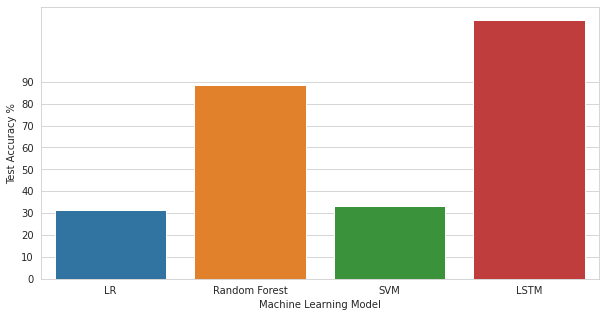

In [ ]:
import seaborn as sns
model = ['LR', 'Random Forest',  'SVM', 'LSTM']
acc = [acc_lr, acc_rfr, acc_svm, accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model, y= acc)
plt.show()

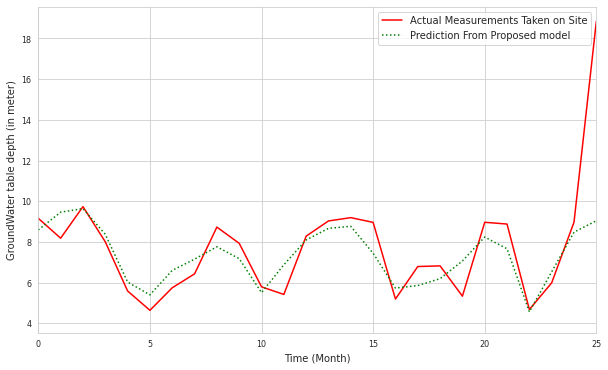

In [ ]:
f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(10, 6))

ax1.plot(Outputs[144:], color="red", linestyle="-", linewidth=1.5, label="Actual Measurements Taken on Site")
ax1.plot(y_pred_dep, color="green", linestyle=":", linewidth=1.5, label="Prediction From Proposed model")

plt.legend(loc='upper right')
plt.xticks(fontsize=8,fontweight='normal')
plt.yticks(fontsize=8,fontweight='normal')
plt.xlabel('Time (Month)', fontsize=10)
plt.ylabel('GroundWater table depth (in meter)', fontsize=10)
plt.xlim(0, 25)

# plt.savefig('results.png', format='png')
plt.show()
     
